In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
# 讀取糖尿病資料集
diabetes = datasets.load_diabetes()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

# diabetes
regr
# diabetes.data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
print(regr.coef_)

[  33.40877011 -292.24672884  481.07153405  369.06269614 -966.37849405
  589.81383056  232.61924401  288.3263166   802.72704593   37.81285219]


In [13]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 2939.42


In [45]:
x_test[0]

array([-0.04183994, -0.04464164, -0.04931844, -0.03665645, -0.00707277,
       -0.02260797,  0.08545648, -0.03949338, -0.06648815,  0.00720652])

In [30]:
y_test[0:10]

array([128.,  69., 174.,  72., 167., 302., 160., 178.,  51.,  77.])

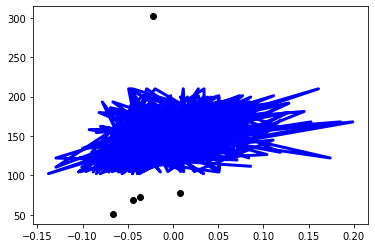

In [51]:
# 畫出回歸模型與實際資料的分佈
plt.scatter(x_test[0], y_test[0:10],  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.show()

### LASSO

In [35]:
# 讀取糖尿病資料集
diabetes = datasets.load_diabetes()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=4)

# 建立一個線性回歸模型
lasso = linear_model.Lasso(alpha=1.0)

# 將訓練資料丟進去模型訓練
lasso.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = lasso.predict(x_test)

In [36]:
# 印出各特徵對應的係數，可以看到許多係數都變成 0，Lasso Regression 的確可以做特徵選取
lasso.coef_

array([  0.        ,  -0.        , 321.203877  ,  57.74744332,
         0.        ,   0.        ,  -0.        ,   0.        ,
       332.41817196,   0.        ])

In [37]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 3505.84


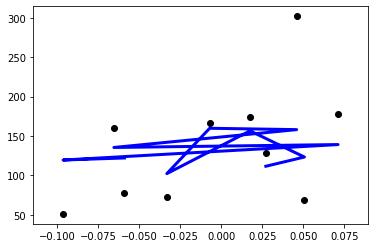

In [38]:
# 畫出回歸模型與實際資料的分佈
plt.scatter(x_test[1], y_test[0:10],  color='black')
plt.plot(x_test[1], y_pred[0:10], color='blue', linewidth=3)
plt.show()

### Ridge

In [25]:
# 讀取糖尿病資料集
diabetes = datasets.load_diabetes()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=4)

# 建立一個線性回歸模型
ridge = linear_model.Ridge(alpha=1.0)

# 將訓練資料丟進去模型訓練
ridge.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

In [28]:
# 印出 Ridge 的參數，可以很明顯看到比起 Linear Regression，參數的數值都明顯小了許多
print(ridge.coef_)

[  48.8125786   -85.49511577  270.22532535  201.91767903   17.41308665
  -19.04346706 -136.47737574  122.26503311  247.60074795   95.59855598]


In [26]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 2939.42


可以看見 LASSO 與 Ridge 的結果並沒有比原本的線性回歸來得好，
這是因為目標函數被加上了正規化函數，讓模型不能過於複雜，相當於限制模型擬和資料的能力。因此若沒有發現 Over-fitting 的情況，是可以不需要一開始就加上太強的正規化的。

## 練習時間

請使用其他資料集 (boston, wine)，並調整不同的 alpha 來觀察模型訓練的情形。